Dataset Shape: (500, 11)

First 5 rows of the dataset:
       XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  TARGET CLASS  
0 -0.932794  1.008313 -1.069627             0  
1 -0.461864  0.258321 -1.041546             1  
2  1.149298  2.184784  0.342811             1  
3 -0.888557  0.162310 -0.002793             0  
4  0.391419 -1.365603  0.787762             0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  


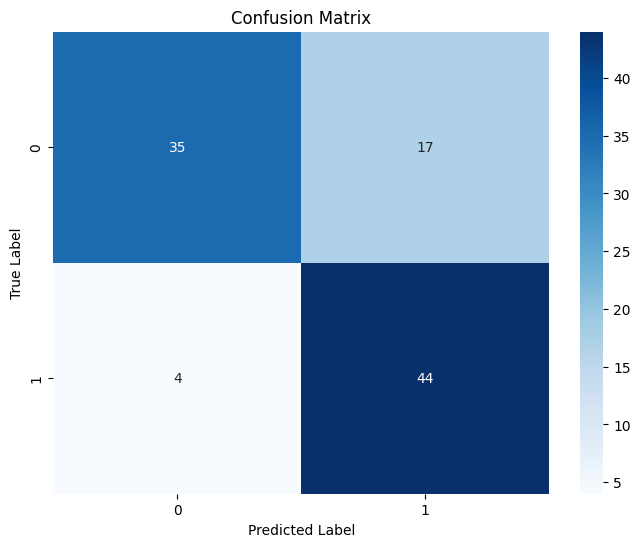


=== FEATURE IMPORTANCE ===
  Feature  Importance
2    TRAT    0.320174
4    IGGA    0.153110
1    GWYH    0.146958
9    JHZC    0.114853
6    EDFS    0.114214
3    TLLZ    0.072997
5    HYKR    0.038998
7    GUUB    0.025564
0    XVPM    0.009595
8    MGJM    0.003537


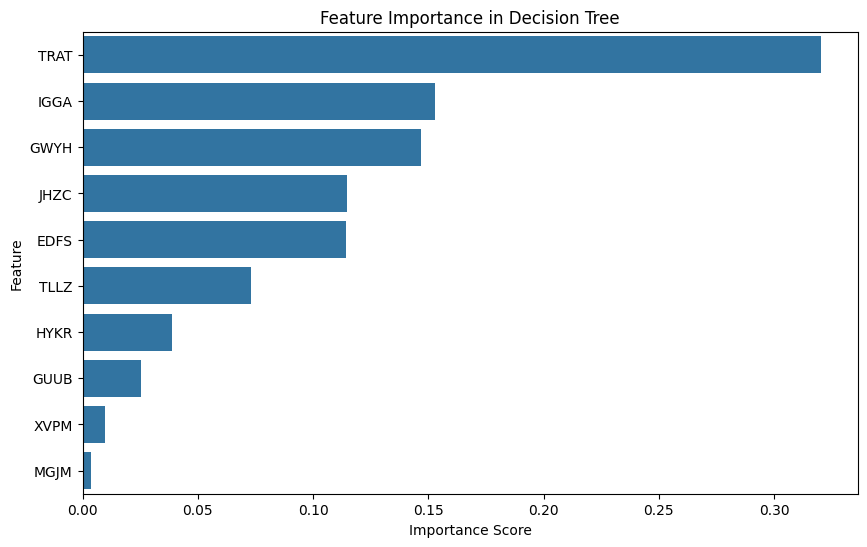

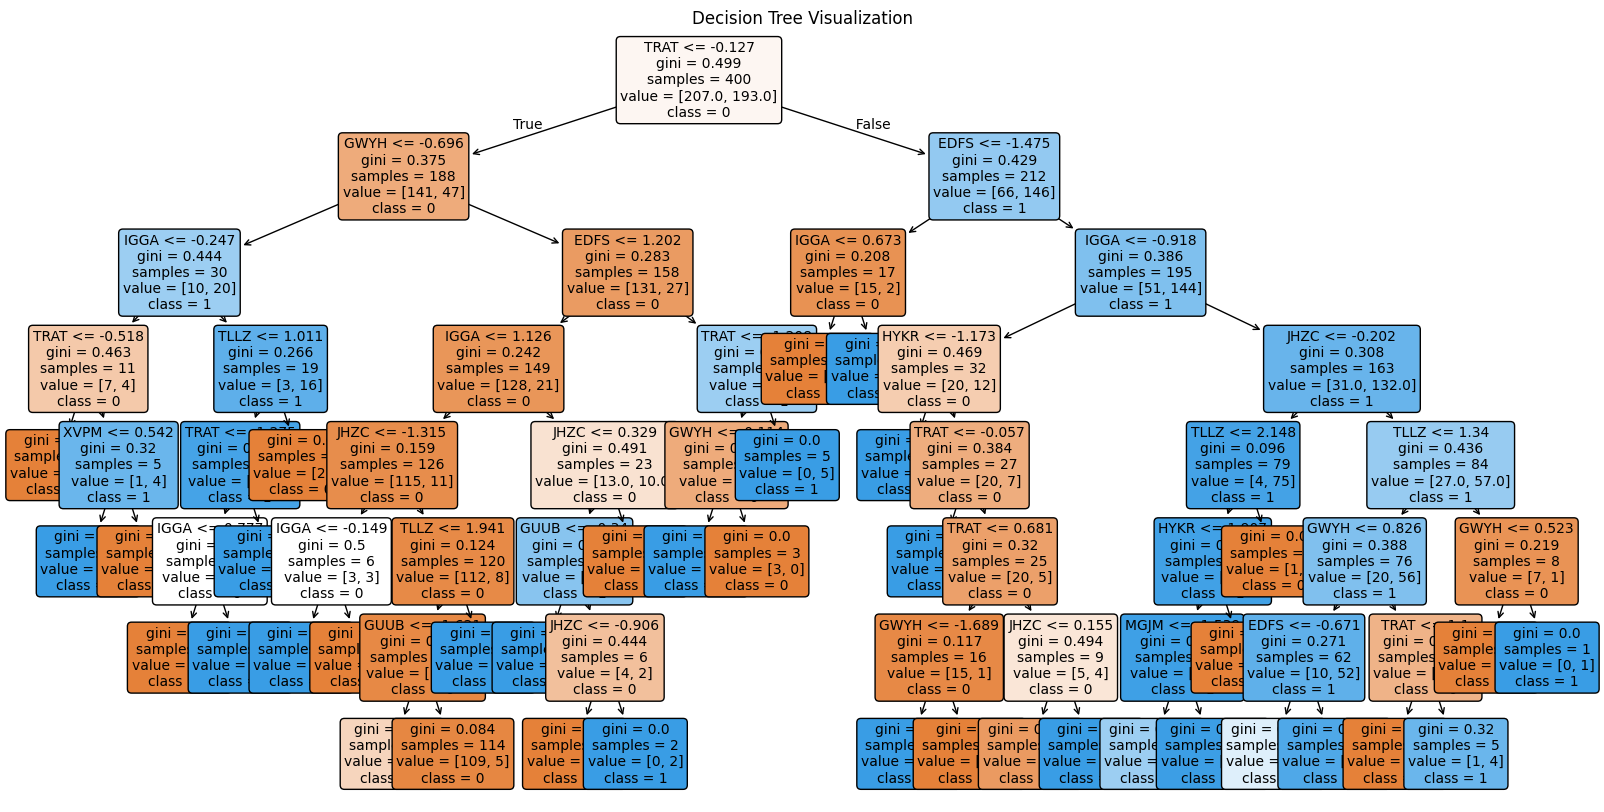


=== MAKING PREDICTIONS ON NEW DATA ===
Sample Predictions:
Sample 1:
  Actual class: 1
  Predicted class: 1
  Prediction probabilities: [0.45454545 0.54545455]

Sample 2:
  Actual class: 0
  Predicted class: 0
  Prediction probabilities: [1. 0.]

Sample 3:
  Actual class: 0
  Predicted class: 0
  Prediction probabilities: [1. 0.]

Sample 4:
  Actual class: 1
  Predicted class: 1
  Prediction probabilities: [0.01351351 0.98648649]

Sample 5:
  Actual class: 1
  Predicted class: 1
  Prediction probabilities: [0.01351351 0.98648649]


=== MODEL SUMMARY ===
Algorithm: Decision Tree Classifier
Number of features: 10
Number of classes: 2
Tree depth: 7
Number of leaves: 37
Training samples: 400
Testing samples: 100
Final test accuracy: 0.7900

=== ANALYSIS COMPLETE ===


In [ ]:
# Decision Tree Classification - Complete Implementation, ML algorithm used to classify the data 
# Activity 2: Classification using Decision Tree

# 1. Import Necessary Libraries
import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns                  # For statistical data visualization
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree              # For visualizing the decision tree
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

# 2. Load and Explore the Dataset
# Loading the sample_data.csv file
data = pd.read_csv('sample_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

# 3. Data Preprocessing
# Separate features (X) and target variable (y)
# Check what columns are available in your dataset
print("Available columns in dataset:")
print(data.columns.tolist())#converting all columns to list

# Based on your dataset, the target column should be the last one
target_column = data.columns[-1]  # Get the last column name
print(f"Using target column: {target_column}")

X = data.drop(target_column, axis=1)  # Features (all columns except target)
y = data[target_column]               # Target variable

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check if there are any categorical variables that need encoding
print("\nFeature data types:")
print(X.dtypes)

# Encode categorical variables if any
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':  # If column contains strings/categorical data
        le = LabelEncoder()#function
        X[column] = le.fit_transform(X[column])#fit_transform-> to scale training data( how much expansion can happen? mean, standord deviation)
        label_encoders[column] = le
        print(f"Encoded column: {column}")

# Encode target variable if it's categorical
if y.dtype == 'object':
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(y)
    print("Target variable encoded")

# 4. Split the Dataset
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class distribution
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 5. Create and Train the Decision Tree Model
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',       # Splitting criterion (gini or entropy)#quantifies probability of impurities of randomness
    max_depth=7,            # Maximum depth of the tree
    min_samples_split=2,    # Minimum samples required to split a node
    min_samples_leaf=1,     # Minimum samples required at a leaf node
    random_state=42         # For reproducible results
)

# Train the model
print("\nTraining the Decision Tree model...")
dt_classifier.fit(X_train, y_train)
print("Model training completed!")

# 6. Make Predictions
# Predict on training set
y_train_pred = dt_classifier.predict(X_train)

# Predict on testing set
y_test_pred = dt_classifier.predict(X_test)

print("\nPredictions completed!")

# 7. Evaluate Model Performance
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n=== MODEL PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Detailed classification report
print(f"\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_test_pred))

# 8. Confusion Matrix
print(f"\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Feature Importance
print(f"\n=== FEATURE IMPORTANCE ===")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.show()

# 10. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns,
               class_names=[str(i) for i in np.unique(y)],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

# 11. Make Predictions on New Data (Example)
print(f"\n=== MAKING PREDICTIONS ON NEW DATA ===")
# Example: predict the first few samples from test set
sample_predictions = dt_classifier.predict(X_test.iloc[:5])
sample_probabilities = dt_classifier.predict_proba(X_test.iloc[:5])#iloc-->first five samples 

print("Sample Predictions:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  Actual class: {y_test.iloc[i]}")
    print(f"  Predicted class: {sample_predictions[i]}")
    print(f"  Prediction probabilities: {sample_probabilities[i]}")
    print()

# 12. Model Summary
print(f"\n=== MODEL SUMMARY ===")
print(f"Algorithm: Decision Tree Classifier")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Final test accuracy: {test_accuracy:.4f}")

print("\n=== ANALYSIS COMPLETE ===")